# Introduction 

In this project, I'll try to predict the total number of bikes people rented in a given hour. 

Many U.S. cities have communal bike sharing stations where you can rent bicycles by the hour or day. Washington, D.C. is one of these cities. The District collects detailed data on the number of bicycles people rent by the hour and day.

Hadi Fanaee-T at the University of Porto compiled this data into a CSV file, which you'll work with in this project. The file contains 17380 rows, with each row representing the number of bike rentals for a single hour of a single day. You can download the data from the University of California, [Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset).

Here are the descriptions for the relevant columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)

I'll predict the **cnt column** using all of the other columns, except for casual and registered. To accomplish this, I'll create a few different machine learning models and evaluate their performance.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import roc_auc_score,mean_squared_error
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

bike_rentals=pd.read_csv("bike_rental_hour.csv")
bike_rentals.head(20)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14


(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

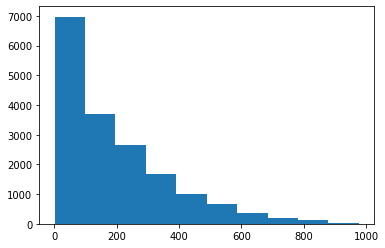

In [2]:
plt.hist(bike_rentals["cnt"])

In [3]:
bike_rentals.corr()["cnt"]

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64

Features registered and casual are strongly correlated. While, there are some columns that are weakly but negatively correlated such as holiday, weathersit and hum. 

# Feature Engineering

It can often be helpful to calculate features before applying machine learning models. Features can enhance the accuracy of models by introducing new information or distilling existing information.

For example, the hr column in bike_rentals contains the hours during which bikes are rented, from 1 to 24. A machine treats each hour differently, without understanding that certain hours are related. We can introduce some order into the process by creating a new column with labels for morning, afternoon, evening, and night. This bundles similar times together, enabling the model to make better decisions.

I am going to add time_label column to the data set that contains some numbers representing morning, afternoon, evening, and night.

- 1 if the hour is from 6 to 12
- 2 if the hour is from 12 to 18
- 3 if the hour is from 18 to 24
- 4 if the hour is from 0 to 6

In [4]:
def assign_label(hour):
    if hour>=0 and hour<6:
        return 4
    elif hour>=6 and hour<12:
        return 1
    elif hour>=12 and hour<18:
        return 2
    elif hour>=18 and hour<=24:
        return 3
    
bike_rentals["time_label"]=bike_rentals["hr"].apply(assign_label)

bike_rentals.head(10)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,time_label
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0000,3,13,16,4
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0000,8,32,40,4
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0000,5,27,32,4
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0000,3,10,13,4
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0000,0,1,1,4
5,6,2011-01-01,1,0,1,5,0,6,0,2,0.24,0.2576,0.75,0.0896,0,1,1,4
6,7,2011-01-01,1,0,1,6,0,6,0,1,0.22,0.2727,0.80,0.0000,2,0,2,1
7,8,2011-01-01,1,0,1,7,0,6,0,1,0.20,0.2576,0.86,0.0000,1,2,3,1
8,9,2011-01-01,1,0,1,8,0,6,0,1,0.24,0.2879,0.75,0.0000,1,7,8,1
9,10,2011-01-01,1,0,1,9,0,6,0,1,0.32,0.3485,0.76,0.0000,8,6,14,1


# Split data for training and testing

Splitting the data into training and testing sets. This will enable us to train an algorithm using the training set, and evaluate its accuracy on the testing set. If we train an algorithm on the training data, then evaluate its performance on the same data, we can get an unrealistically low error value, due to overfitting.
   - Train- **Selecting 80%** of the rows in bike_rentals to be part of the training set **using the sample method**. 
   - Test- Selecting the rows that are in bike_rentals but not in train to be in the testing set


### Choosing Error Metrics

The mean squared error metric makes the most sense to evaluate our error. MSE works on continuous numeric data, which fits our data quite well.



In [5]:
train=bike_rentals.sample(frac=0.8,random_state=1)


# Selecting the rows that are in bike_rentals but not in train to be in the testing set

test= bike_rentals.loc[~bike_rentals.index.isin(train.index)]

# Features Selection

**We will have to ignore casual and registered features as cnt (target column) is derived by adding casual and refistered features.** That is why we have seen high correlation with target column.


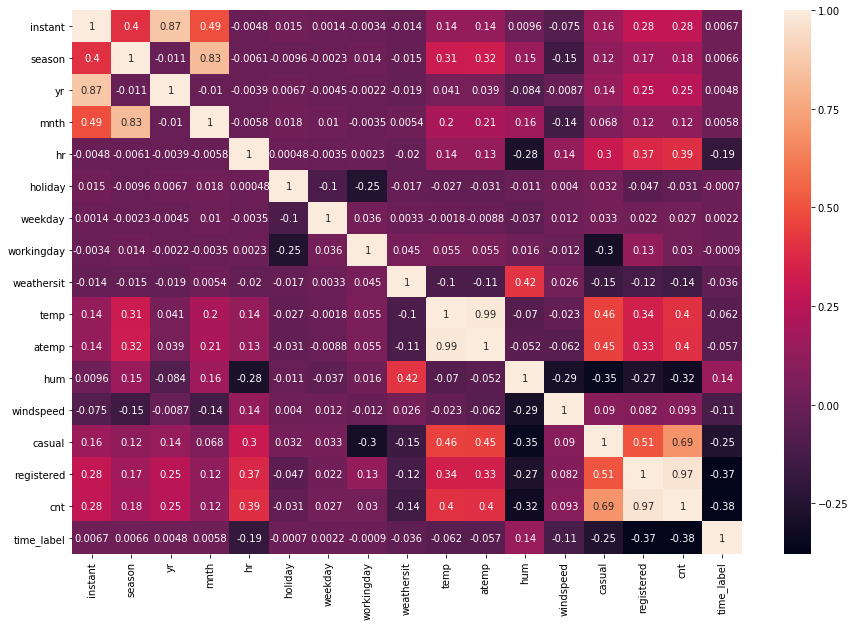

In [6]:
plt.figure(figsize=(15, 10))
sns.heatmap(bike_rentals.corr(), annot=True)


To make the feature list following notes are considered:

- Removing casual and registered columns because cnt is sum of them.
- temp and atemp columns have collinearity. So, I am going to exclude atemp column.
- dteday is also excluded since it is not numeric and its data is mentioned in other columns.
- instant will also be removed since it is only an id.
- cnt (target column).

In [7]:
features= train.columns.drop(['cnt', 'casual', 'registered', 'atemp', 'dteday', 'instant'])

features.tolist()

['season',
 'yr',
 'mnth',
 'hr',
 'holiday',
 'weekday',
 'workingday',
 'weathersit',
 'temp',
 'hum',
 'windspeed',
 'time_label']

# Linear Regression Model

Linear regression works fairly well on this data, given that many of the columns are highly correlated with cnt. Linear regression works best when predictors are linearly correlated to the target and also independent. In other words, they don't change meaning when we combine them with each other. The good thing about linear regression is that it's fairly resistant to overfitting because it's straightforward. It also can be prone to underfitting the data, however, and not building a powerful enough model. This means that linear regression usually isn't the most accurate option.


In [8]:
lr=LinearRegression()
model=lr.fit(train[features],train["cnt"])
# Out-sample-error
prediction_test=model.predict(test[features])
mean_sq_error_test=mean_squared_error(test["cnt"],prediction_test)

#in-sample-error
prediction_train=model.predict(train[features])

mean_sq_error_train=mean_squared_error(train["cnt"],prediction_train)

print("in sample error (training error):",mean_sq_error_train)
print("out sample error (testing error):",mean_sq_error_test)
print("Difference:",mean_sq_error_train-mean_sq_error_test)

in sample error (training error): 17614.859862661284
out sample error (testing error): 17091.34973731613
Difference: 523.5101253451539


**Remark** The errors are very high, which may be due to the fact that the data has a few extremely high rental counts, but otherwise mostly low counts. Larger errors are penalized more with MSE, which leads to a higher total error.

Also,in-sample-error is more than out-sample-error, which means that model seems to be too poor for prediction and there is a probability of underfitting.

# Decision Tree Model

Decision tree algorithm error with the error from linear regression, which will enable us to pick the right algorithm for this dataset.

Decision trees tend to predict outcomes much more reliably than linear regression models, because a decision tree is a fairly complex model, it also tends to overfit, particularly when we don't tweak parameters like maximum depth and minimum number of samples per leaf. Decision trees are also prone to instability -- small changes in the input data can result in a very different output model.

In [9]:
def DecisionTreeRegressor_model(train,test,min_samples_leaf,max_depth=None):
    dtr=DecisionTreeRegressor(min_samples_leaf=min_samples_leaf,max_depth=max_depth)
    model_dtr=dtr.fit(train[features],train["cnt"])
    predictions_dtr=model_dtr.predict(test[features])
    mean_sq_error_dtr=mean_squared_error(test["cnt"],predictions_dtr)
    return mean_sq_error_dtr


In [10]:
mse_values_test=[]
mse_values_train=[]

for i in range(2,20,1):
    mse_test=DecisionTreeRegressor_model(train,test,min_samples_leaf=i,max_depth=None)
    mse_values_test.append(mse_test)
    mse_train=DecisionTreeRegressor_model(train,train,min_samples_leaf=i,max_depth=None)
    mse_values_train.append(mse_train)

Text(0.5, 1.0, 'Error of Decision Tree Regression with changing min_samples_leaf')

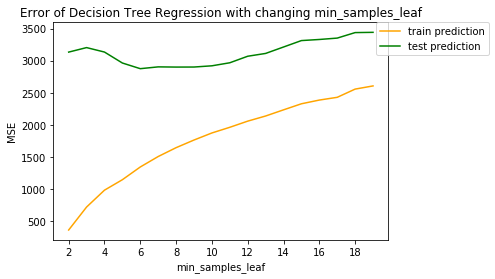

In [11]:
x = range(2, 20, 1)
plt.plot(x,mse_values_train, label = 'train prediction', color='orange')

plt.plot(x,mse_values_test, label = 'test prediction', color='green')
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')
plt.xticks(range(2, 20, 2))
plt.title("Error of Decision Tree Regression with changing min_samples_leaf")

The validation error decreases from min_samples_leaf of 2 to 6. It almost stagnates for some min_samples_leaf and then increases again. The RMSE of the train set is lower than the RMSE of the test set and increases faster than the validation rate.

**The goal is to choose a min_samples_leaf with low errors and a low difference between errors. I choose 6 since it results in the lowest validation error. This is also the point that error keeps the same for some min_samples_leaf.**

Let's see the errors by setting min_samples_leaf = 6.

In [12]:
drt_leaf_2=DecisionTreeRegressor_model(train,test,min_samples_leaf=2)
print("Decision Tree at min_samples_leaf=2 is ",drt_leaf_2)
drt_leaf_6=DecisionTreeRegressor_model(train,test,min_samples_leaf=6)
print("Decision Tree at min_samples_leaf=6 is ",drt_leaf_6)


Decision Tree at min_samples_leaf=2 is  3113.6116904807573
Decision Tree at min_samples_leaf=6 is  2861.885195098949


In [13]:
drt_depth_10=DecisionTreeRegressor_model(train,test,min_samples_leaf=1,max_depth=10)
drt_depth_15=DecisionTreeRegressor_model(train,test,min_samples_leaf=1,max_depth=15)
print("Decision Tree at max_depth=10 is ",drt_depth_10)
print("Decision Tree at max_depth=15 is ",drt_depth_15)


Decision Tree at max_depth=10 is  3763.5426693662303
Decision Tree at max_depth=15 is  3557.7011926205396


In [14]:
mse_val={}

train_error_dr=[]
test_error_dr=[]

for i in range(2,20,1):
    mse_test=DecisionTreeRegressor_model(train,test,min_samples_leaf=6,max_depth=i)
    mse_val[i]=mse_test
    test_error_dr.append(mse_test)
    mse_train=DecisionTreeRegressor_model(train,train,min_samples_leaf=6,max_depth=i)
    train_error_dr.append(mse_train)
    
print("With min_samples_leaf set at 6, the error {} is observed low at max_depth {}".format(min(test_error_dr),min(mse_val,key=mse_val.get)))

With min_samples_leaf set at 6, the error 2863.8288364868013 is observed low at max_depth 19


Text(0.5, 1.0, 'Error of Decision Tree Regression with changing max_Depth')

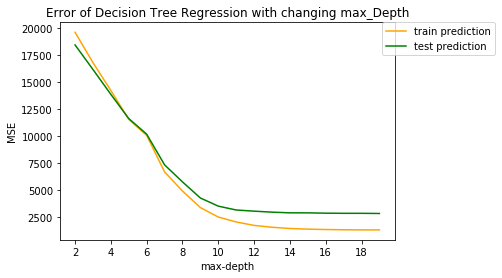

In [15]:
x = range(2, 20, 1)
plt.plot(x,train_error_dr, label = 'train prediction', color='orange')

plt.plot(x,test_error_dr, label = 'test prediction', color='green')
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.xlabel('max-depth')
plt.ylabel('MSE')
plt.xticks(range(2, 20, 2))
plt.title("Error of Decision Tree Regression with changing max_Depth")

In [16]:
mse=DecisionTreeRegressor_model(train,test,min_samples_leaf=6,max_depth=30)
print("With min_samples_leaf set at 6 and the max_depth=30 the error is",mse)

With min_samples_leaf set at 6 and the max_depth=30 the error is 2871.9451030975533


**Remark:** Since,decision tree picks of non-linear relationship between variable, it has higher accuracy than linear regression.

As we see, the accuaracy increased, when maximum depth and minimum samples per leaf were increased.This is because complexity in the model is increased as we added more layers. 


We can conclude by saying that restricting the depth has reduced the accuarcy. The Decision Tree's error at min_samples_leaf=6 is  2865.810553021958 while adding max_depth=30 error was 2870.4064795344534. There is no much difference by introducing max_depth parameter. **So, we will just choose minimum samples per leaf value of 6 for our model.**

# Random Forest Model

Let's apply the random forest algorithm, which improves on the decision tree algorithm. Random forests tend to be much more accurate than simple models like linear regression. Due to the way random forests are constructed, they tend to overfit much less than decision trees. Random forests are prone to overfitting, so it's important to tune parameters like maximum depth and minimum samples per leaf.

In [17]:
def RandomForestRegressor_model(train,test,min_samples_leaf,max_depth=None):
    rfr=RandomForestRegressor(min_samples_leaf=min_samples_leaf,max_depth=max_depth,n_estimators=100)
    model_rfr=rfr.fit(train[features],train["cnt"])
    predictions_rfr=model_rfr.predict(test[features])
    mean_sq_error_rfr=mean_squared_error(test["cnt"],predictions_rfr)
    return mean_sq_error_rfr

In [18]:
rfr_dict={}

rfr=RandomForestRegressor(min_samples_leaf=2,n_estimators=100)
model_rfr=rfr.fit(train[features],train["cnt"])
predictions_rfr=model_rfr.predict(test[features])
mean_sq_error_rfr=mean_squared_error(test["cnt"],predictions_rfr)

mean_sq_error_rfr

1972.1336463113712

In [19]:
rfr=RandomForestRegressor(min_samples_leaf=5,n_estimators=100)
model_rfr=rfr.fit(train[features],train["cnt"])
predictions_rfr=model_rfr.predict(test[features])
mean_sq_error_rfr=mean_squared_error(test["cnt"],predictions_rfr)

mean_sq_error_rfr

2186.880306493974

In [20]:
rfr=RandomForestRegressor(max_depth=10,n_estimators=100)
model_rfr=rfr.fit(train[features],train["cnt"])
predictions_rfr=model_rfr.predict(test[features])
mean_sq_error_rfr=mean_squared_error(test["cnt"],predictions_rfr)

mean_sq_error_rfr

2772.0790408684875

In [21]:
rfr=RandomForestRegressor(max_depth=20,n_estimators=100)
model_rfr=rfr.fit(train[features],train["cnt"])
predictions_rfr=model_rfr.predict(test[features])
mean_sq_error_rfr=mean_squared_error(test["cnt"],predictions_rfr)

mean_sq_error_rfr

1978.0949411937834

In [22]:
mse_values_test_rfr=[]
mse_values_train_rfr=[]

mse_val_rfr=np.inf
leaf=0
for i in range(2,20,1):
    mse_test=RandomForestRegressor_model(train,test,min_samples_leaf=i,max_depth=None)
    mse_values_test_rfr.append(mse_test)
    if mse_test<mse_val_rfr:
        mse_val_rfr=mse_test
        leaf=i
    mse_train=RandomForestRegressor_model(train,train,min_samples_leaf=i,max_depth=None)
    mse_values_train_rfr.append(mse_train)
    
print("With min_samples_leaf set at {} the error of {} is lowest".format(leaf,mse_val_rfr))

With min_samples_leaf set at 2 the error of 1983.2642070172083 is lowest


Text(0.5, 1.0, 'Error of Random Forest Regression with changing min_samples_leaf')

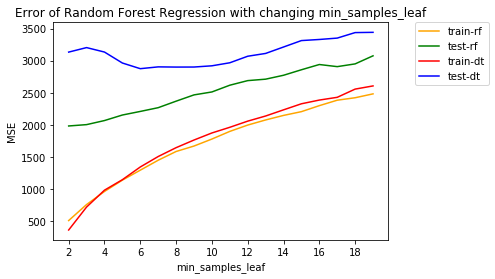

In [23]:
x = range(2, 20, 1)

plt.plot(x,mse_values_train_rfr, label = 'train-rf', color='orange')
plt.plot(x,mse_values_test_rfr, label = 'test-rf', color='green')
plt.plot(x,mse_values_train, color='red', label = 'train-dt')
plt.plot(x,mse_values_test, color='blue', label = 'test-dt')
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.xlabel('min_samples_leaf')
plt.ylabel('MSE')
plt.xticks(range(2, 20, 2))
plt.title("Error of Random Forest Regression with changing min_samples_leaf")

By removing some of the sources of overfitting, the random forest accuracy is improved over the decision tree accuracy.

**The above plot shows clearly that the random forest model gives lower validation errors than the decision tree.** The difference between errors is also decreased for all min_samples_leaf so the random forest seems more fitted. Let's choose min_samples_leaf = 6 and change max_depth to see if we can get better results.

Text(0.5, 1.0, 'Error of Decision Tree and Random Forest Regression with changing max_depth')

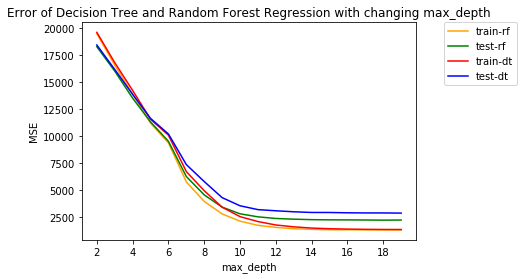

In [24]:
x = range(2, 20, 1)
train_mses_rfr = []
test_mses_rfr= []
for i in range(2, 20, 1):
    train_error = RandomForestRegressor_model(train,train,min_samples_leaf=6,max_depth=i)
    test_error = RandomForestRegressor_model(train,test,min_samples_leaf=6,max_depth=i)
    train_mses_rfr.append(train_error)
    test_mses_rfr.append(test_error)

plt.plot(x,train_mses_rfr, label = 'train-rf', color='orange')

plt.plot(x,test_mses_rfr, label = 'test-rf', color='green')



# values taken from decision tree model with varying max_depth
plt.plot(x,train_error_dr, color='red', label = 'train-dt')
plt.plot(x,test_error_dr, color='blue', label = 'test-dt')
plt.legend(bbox_to_anchor=(1.3,1), borderaxespad=0)
plt.xlabel('max_depth')
plt.ylabel('MSE')
plt.xticks(range(2, 20, 2))
plt.title("Error of Decision Tree and Random Forest Regression with changing max_depth")

# Conclusion

In [25]:
drt_leaf_6_test=round(DecisionTreeRegressor_model(train,test,min_samples_leaf=6),2)
drt_leaf_6_train=round(DecisionTreeRegressor_model(train,train,min_samples_leaf=6),2)

drt_depth_19_test=round(DecisionTreeRegressor_model(train,test,min_samples_leaf=6,max_depth=19),2)
drt_depth_19_train=round(DecisionTreeRegressor_model(train,train,min_samples_leaf=6,max_depth=19),2)

rfr_leaf_6_test=round(RandomForestRegressor_model(train,test,min_samples_leaf=6,max_depth=None),2)
rfr_leaf_6_train=round(RandomForestRegressor_model(train,train,min_samples_leaf=6,max_depth=None),2)

rfr_depth_19_test=round(RandomForestRegressor_model(train,test,min_samples_leaf=6,max_depth=19),2)
rfr_depth_19_train=round(RandomForestRegressor_model(train,train,min_samples_leaf=6,max_depth=19),2)


summary=pd.DataFrame(index=["Linear Regression", "DT with min_samples_leaf=6", "DT with min_samples_leaf=6,max_depth=19",
                            "RF min_samples_leaf=6", "RF min_samples_leaf=6 max_depth=19"],
                     columns=["test_mse","train_mse"],
                     data=np.array([[round(mean_sq_error_train,2),round(mean_sq_error_test,2)],[drt_leaf_6_test,drt_leaf_6_train]
                                   ,[drt_depth_19_test,drt_depth_19_train],[rfr_leaf_6_test,rfr_leaf_6_train],
                                   [rfr_depth_19_test,rfr_depth_19_train]]))

summary["difference"]=summary.iloc[:,0]-summary.iloc[:,1]

summary

,test_mse,train_mse,difference
Linear Regression,17614.86,17091.35,523.51
DT with min_samples_leaf=6,2864.96,1345.19,1519.77
"DT with min_samples_leaf=6,max_depth=19",2870.51,1346.40,1524.11
RF min_samples_leaf=6,2246.23,1300.42,945.81
RF min_samples_leaf=6 max_depth=19,2253.91,1298.73,955.18


# Conclusion
Though difference in Linear Regression is less than other models, it has high training and validation errors. While, Random Forest performed better than decision tree. But,adding max_depth parameter didn't significantly improve the performance in both the models. 

There is further scope in improving the accuracy by tuning the parameters. For instance, increasing the trees.

As per our predictions, the random forest model with min_samples_leaf of 6 performed better over other models.
